In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits import mplot3d

In [6]:
x = np.linspace(1, 3, 30)
y = np.linspace(1, 3, 30)
X, Y = np.meshgrid(x, y)

a, b, c = 5, -2.0, 1.0

f = lambda x, y: a + b*x + c*y
Z = f(X, Y)

C:\Users\SergeyVasin\AppData\Local\Temp\ipykernel_21764\3147353647.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


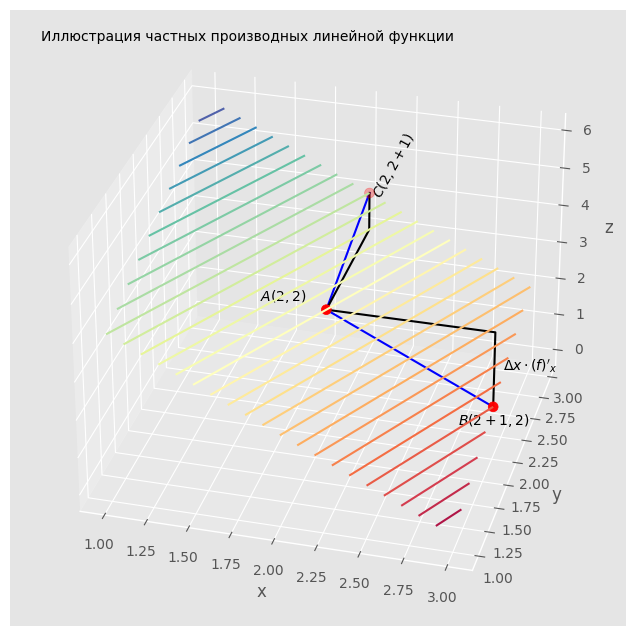

In [21]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 30, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter([2, 2, 3], [2, 3, 2], [f(2,2), f(2,3), f(3,2)], s=50, c='r')
ax.plot([2, 2, 3], [3, 2, 2], [f(2,3), f(2,2), f(3,2)], c='b')
ax.plot([2, 2, 2, 3, 3], [3, 3, 2, 2, 2], [f(2,3), f(2,2), f(2,2), f(2,2), f(3,2)], c='black')

ax.view_init(30, -75)
ax.text3D(1.6, 2, 3, '$A(2, 2)$', color='black')
ax.text3D(2.0, 3, 3.9, '$C(2, 2+1)$', zdir='y')
ax.text3D(2.85, 1.75, 1, '$B(2+1, 2)$')
ax.text3D(3.05, 2, 2, "$\Delta x \cdot (f)'_x$")
ax.text2D(0.05, 0.95, 'Иллюстрация частных производных линейной функции', transform=ax.transAxes)
fig.show()


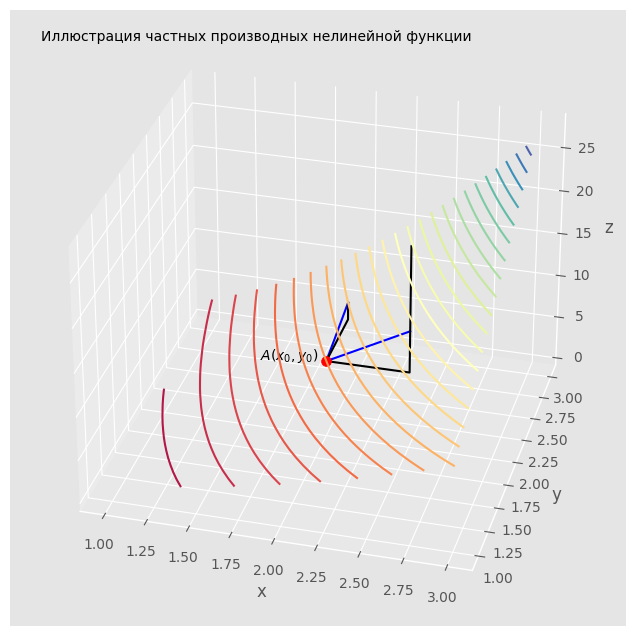

In [24]:
x = np.linspace(1, 3, 30)
y = np.linspace(1, 3, 30)
X, Y = np.meshgrid(x, y)

f = lambda x, y: x**2*y
Z = f(X, Y)

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 30, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter([2], [2], f(2,2), s=50, c='r')
ax.plot([2, 2, 2.5], [2.5, 2, 2], [f(2,2.5), f(2,2), f(2.53,2)], c='b')
ax.plot([2, 2, 2, 2.5, 2.5], [2.5, 2.5, 2, 2, 2], [f(2,2.5), f(2,2), f(2,2), f(2,2), f(3,2.5)], c='black')

ax.view_init(30, -75)
ax.text3D(1.6, 2, 7, '$A(x_0, y_0)$', color='black')
ax.text2D(0.05, 0.95, 'Иллюстрация частных производных нелинейной функции', transform=ax.transAxes)
plt.show()


In [25]:
g = lambda x, y: (2*x*y, x**2)

def genPfun(f, g, x0, y0):
    def Pfun(x, y, f=f, g=g, x0=x0, y0=y0):
        a, b = g(x0, y0)
        return f(x0, y0) + a*(x-x0) + b*(y-y0)
    return Pfun

Pfun = genPfun(f=f, g=g, x0=2, y0=2)
ZP = Pfun(X, Y)

print(Pfun(2, 2), f(2, 2))

8 8


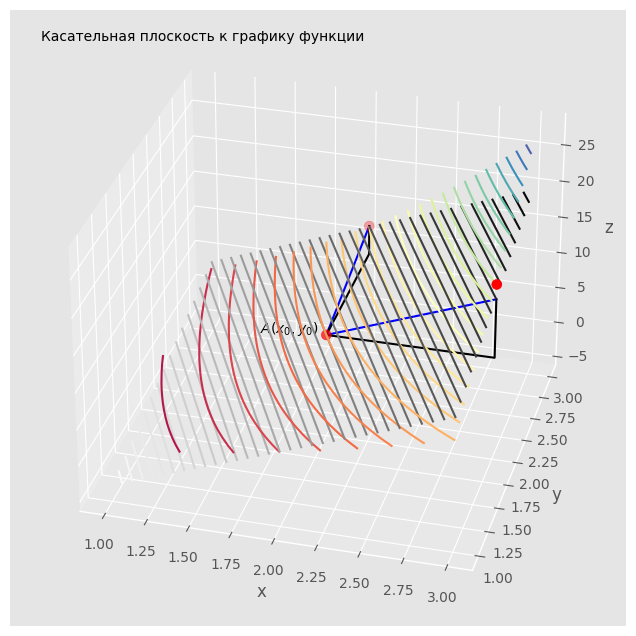

In [30]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 30, cmap=plt.cm.Spectral)
ax.contour3D(X, Y, ZP, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter([2, 2, 3], [2, 3, 2], [f(2,2), f(2,3), f(3,2)], s=50, c='r')
ax.plot([2, 2, 3], [3, 2, 2], [Pfun(2,3), f(2,2), Pfun(3,2)], c='b')
ax.plot([2, 2, 2, 3, 3], [3, 3, 2, 2, 2], [Pfun(2,3), f(2,2), f(2,2), f(2,2), Pfun(3,2)], c='black')

ax.view_init(30, -75)
ax.text3D(1.6, 2, 7, '$A(x_0, y_0)$', color='black')
ax.text2D(0.05, 0.95, 'Касательная плоскость к графику функции', transform=ax.transAxes)
plt.show()

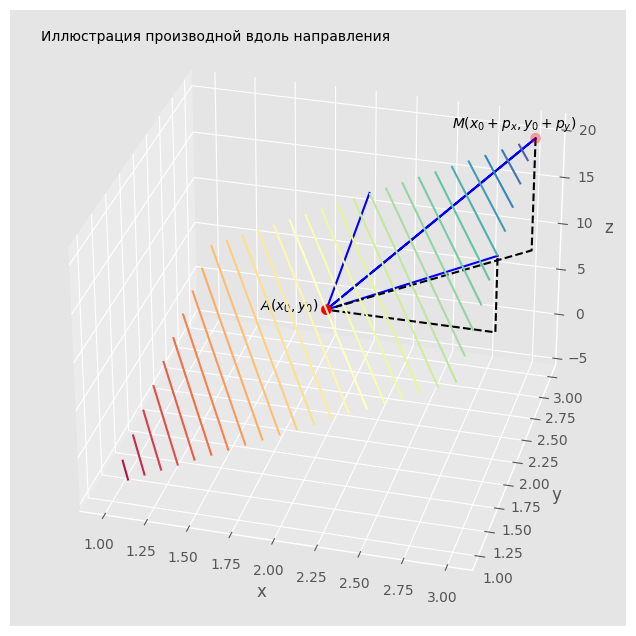

In [31]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, ZP, 30, cmap=plt.cm.Spectral)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter([2, 3], [2, 3], [f(2,2), Pfun(3,3)], s=50, c='r')
ax.plot([2, 2, 3, 2, 3], [3, 2, 3, 2, 2], [Pfun(2,3), f(2,2), Pfun(3,3), f(2,2), Pfun(3,2)], c='b')
ax.plot([3, 3, 2, 3, 3], [3, 3, 2, 2, 2], [Pfun(3,3), f(2,2), f(2,2), f(2,2), Pfun(3,2)], c='black', linestyle='--')


ax.view_init(30, -75)
ax.text3D(1.6, 2, 7, '$A(x_0, y_0)$', color='black')
ax.text3D(2.5, 3, 20, '$M(x_0+p_x, y_0+p_y)$', color='black')
ax.text2D(0.05, 0.95, 'Иллюстрация производной вдоль направления', transform=ax.transAxes)
plt.show()